In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
import pickle
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pylab as plt


In [ ]:
df = pd.read_csv("customers.csv")

In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.shape

(10695, 11)

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df1 = df.dropna(axis = 0)

In [ ]:
df1.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df1.shape

(8819, 11)

In [ ]:
df1.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df1['Gender'].unique(),df1['Ever_Married'].unique(),df1['Graduated'].unique(),df1['Profession'].unique(),df1['Spending_Score'].unique(),df1['Var_1'].unique(),df1['Segmentation'].unique()

(array(['Male', 'Female'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
        'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
       dtype=object),
 array(['Low', 'High', 'Average'], dtype=object),
 array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
       dtype=object),
 array(['D', 'B', 'C', 'A'], dtype=object))

In [ ]:
category_list = [['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
        'Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]

In [ ]:
enc = OrdinalEncoder(categories = category_list)

In [ ]:
customer1 = df1.copy()

In [ ]:
customer1[['Gender','Ever_Married'
          ,'Graduated','Profession'
            ,'Spending_Score']] = enc.fit_transform(customer1[['Gender','Ever_Married'
                                                             ,'Graduated','Profession'
                                                             ,'Spending_Score']])

In [ ]:
customer1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
Le = LabelEncoder()

In [ ]:
customer1['Segmentation'] = Le.fit_transform(customer1['Segmentation'])

In [ ]:
customer1 = customer1.drop('ID',axis=1)
customer1 = customer1.drop('Var_1',axis=1)

In [ ]:
customer1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
corr = customer1.corr()

<Axes: >

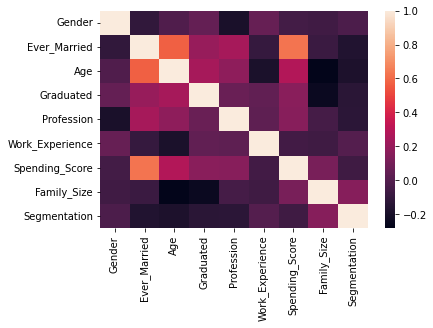

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [ ]:
X = customer1[['Gender','Age','Ever_Married','Graduated','Profession','Spending_Score','Work_Experience','Family_Size']].values

In [ ]:
y1 = customer1[['Segmentation']].values

In [ ]:
onehot_enc = OneHotEncoder()

In [ ]:
onehot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y = onehot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.33,random_state=50)

In [ ]:
xtrain[0]

array([ 1., 85.,  1.,  0.,  2.,  0.,  0.,  1.])

In [ ]:
xtrain.shape

(5908, 8)

In [ ]:
xtest.shape

(2911, 8)

In [ ]:
scaler_age = MinMaxScaler()

In [ ]:
scaler_age.fit(xtrain[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
xtrain_scaled = np.copy(xtrain)
xtest_scaled = np.copy(xtest)

In [ ]:
xtrain_scaled[:,2] = scaler_age.transform(xtrain[:,2].reshape(-1,1)).reshape(-1)
xtest_scaled[:,2] = scaler_age.transform(xtest[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
 ai_brain = Sequential([
    Dense(8,input_shape=(8,)),
    Dense(10,activation='relu'),
    Dense(12,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dense(4,activation='softmax')
 ])

In [ ]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
ai_brain.fit(x=xtrain_scaled,y=ytrain,
             epochs=2000,batch_size=256,
             validation_data=(xtest_scaled,ytest),
             )

Epoch 1/2000
24/24 [==============================] - 2s 13ms/step - loss: 1.4659 - accuracy: 0.2446 - val_loss: 1.3782 - val_accuracy: 0.3308
Epoch 2/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.3599 - accuracy: 0.3351 - val_loss: 1.3457 - val_accuracy: 0.3511
Epoch 3/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3356 - accuracy: 0.3665 - val_loss: 1.3294 - val_accuracy: 0.3841
Epoch 4/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.3140 - accuracy: 0.3956 - val_loss: 1.3100 - val_accuracy: 0.3834
Epoch 5/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.2984 - accuracy: 0.3869 - val_loss: 1.2939 - val_accuracy: 0.4085
Epoch 6/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2823 - accuracy: 0.4023 - val_loss: 1.2876 - val_accuracy: 0.3981
Epoch 7/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2745 - accuracy: 0.4106 - val_loss: 1.2853 - val_accuracy: 0.4153
Epoch

In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.465919,0.244584,1.378243,0.330814
1,1.359929,0.335139,1.345690,0.351082
2,1.335601,0.366452,1.329384,0.384060
3,1.314041,0.395565,1.310009,0.383373
4,1.298366,0.386933,1.293864,0.408451


<Axes: >

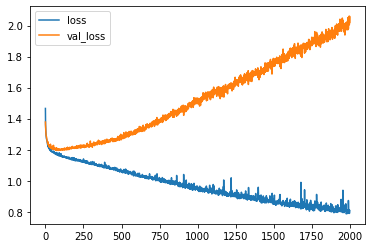

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
xtest_predictions = np.argmax(ai_brain.predict(xtest_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [ ]:
xtest_predictions.shape

(2911,)

In [ ]:
ytest_truevalue = np.argmax(ytest,axis=1)

In [ ]:
ytest_truevalue.shape

(2911,)

In [ ]:
print(confusion_matrix(ytest_truevalue,xtest_predictions))

[[289 172 108 188]
 [212 203 160 111]
 [116 179 302  89]
 [153 117  80 432]]


In [ ]:
print(classification_report(ytest_truevalue,xtest_predictions))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38       757
           1       0.30      0.30      0.30       686
           2       0.46      0.44      0.45       686
           3       0.53      0.55      0.54       782

    accuracy                           0.42      2911
   macro avg       0.42      0.42      0.42      2911
weighted avg       0.42      0.42      0.42      2911



In [ ]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [ ]:
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(xtest_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 95ms/step


In [ ]:
print(x_single_prediction)

[2]


In [ ]:
print(Le.inverse_transform(x_single_prediction))

['C']
